<a href="https://colab.research.google.com/github/Baco23/github-course/blob/master/LSTM_auto_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# lstm autoencoder recreate sequence

In [0]:
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model

# define input sequence

In [0]:
sequence = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# reshape input into??[samples, timesteps, features] 

In [0]:
n_in = len(sequence)
sequence = sequence.reshape((1, n_in, 1))

# define model

In [0]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_in))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

# fit model

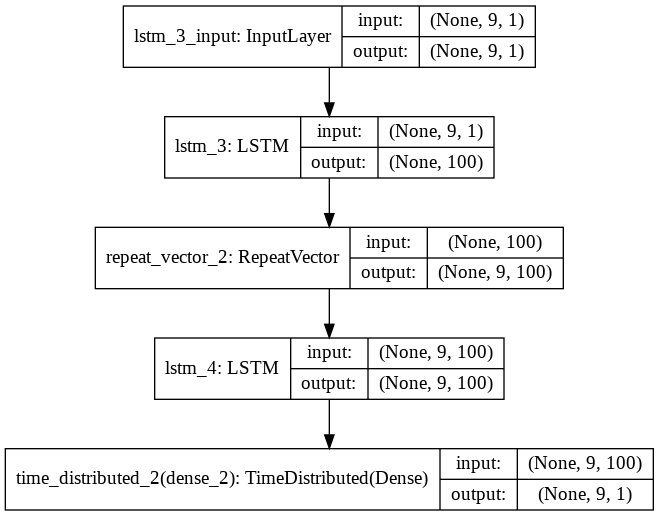

In [13]:
model.fit(sequence, sequence, epochs=300, verbose=0)
plot_model(model, show_shapes=True, to_file='reconstruct_lstm_autoencoder.png')
#X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
#X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

#demonstrate recreation

In [14]:
yhat = model.predict(sequence, verbose=0)
print(yhat[0,:,0])

[0.1037496  0.19947821 0.2987469  0.39963084 0.50039905 0.6005846
 0.70028037 0.79985106 0.8998291 ]
